# Team 3 - US Stock Funadamental Data
_________________________________________________________________________

## Part A - Calculating Sector Growth
There are million of ways to calculate growth of a sector or a company, depending on what you define as growth. One part of a problem is that we have to narrow down the number of things we measure and deciding what to measure is not always easy. In our problem we are measuring a company's growth as Compound Annual Growth Rate of StockHolder's Equity and Net Income Loss.

1. CAGR of Company's Net Income Loss
2. CAGR of Stockholders Equity of a company

To Calculate a sector's growth we will take weighted average of all the companies in a given sector.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv('indicators_by_company.csv',names=['SEC ID','indicator_id','2010','2011','2012','2013','2014','2015','2016'], skiprows=[0])
df1.head(10)

,SEC ID,indicator_id,2010,2011,2012,2013,2014,2015,2016
0,1000045,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,NaN,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0,NaN
1,1000045,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,NaN,2111343.0,2242703.0,2236449.0,2462000.0,NaN
2,1000045,AdjustmentForAmortization,NaN,NaN,-11482251.0,-13490892.0,-13852305.0,-13811000.0,NaN
3,1000045,Assets,NaN,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0,NaN
4,1000045,AssetsHeldForSaleAtCarryingValue,NaN,1373001.0,1203664.0,1696330.0,NaN,NaN,NaN
5,1000045,AssetsOfDisposalGroupIncludingDiscontinuedOper...,NaN,NaN,NaN,NaN,1746887.0,2148000.0,NaN
6,1000045,Cash,NaN,2803054.0,2797716.0,2635036.0,3388193.0,1849000.0,NaN
7,1000045,CashAndCashEquivalentsAtCarryingValue,NaN,2803054.0,2797716.0,NaN,NaN,NaN,NaN
8,1000045,CashAndCashEquivalentsPeriodIncreaseDecrease,NaN,785514.0,-5338.0,NaN,NaN,NaN,NaN
9,1000045,CashPeriodIncreaseDecrease,NaN,NaN,NaN,-162680.0,753157.0,-1539000.0,NaN


In [2]:
df1.drop(['2010','2016'],axis=1, inplace=True)
df1.head()

,SEC ID,indicator_id,2011,2012,2013,2014,2015
0,1000045,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0
1,1000045,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,2111343.0,2242703.0,2236449.0,2462000.0
2,1000045,AdjustmentForAmortization,NaN,-11482251.0,-13490892.0,-13852305.0,-13811000.0
3,1000045,Assets,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0
4,1000045,AssetsHeldForSaleAtCarryingValue,1373001.0,1203664.0,1696330.0,NaN,NaN


In [3]:
df2 = pd.read_csv('companies-names-industries.csv')
df2.head(5)

,SEC ID,Latest Name,Previous Names (@@@ separator),Latest NAICS Industry Sector Name,Latest NAICS Industry Sector Code,Previous NAICS Industry Sector Names (@@@ separator),Previous NAICS Industry Sector Codes (@@@ separator),Latest SIC Industry Code,Previous SIC Industry Codes (@@@ separator)
0,1000045,Nicholas Financial Inc,NaN,Finance and Insurance,52.0,NaN,NaN,6153.0,NaN
1,1000180,Sandisk Corp,NaN,Manufacturing,33.0,NaN,NaN,3572.0,NaN
2,1000209,Medallion Financial Corp,NaN,Finance and Insurance,52.0,NaN,NaN,6199.0,NaN
3,1000228,Henry Schein Inc,NaN,Retail Trade,44.0,NaN,NaN,5047.0,NaN
4,1000229,Core Laboratories N V,NaN,Construction,23.0,NaN,NaN,1389.0,NaN


In [4]:
df2 = df2[['SEC ID','Latest Name','Latest NAICS Industry Sector Name']]
df2.head()

,SEC ID,Latest Name,Latest NAICS Industry Sector Name
0,1000045,Nicholas Financial Inc,Finance and Insurance
1,1000180,Sandisk Corp,Manufacturing
2,1000209,Medallion Financial Corp,Finance and Insurance
3,1000228,Henry Schein Inc,Retail Trade
4,1000229,Core Laboratories N V,Construction


### Merging Data from the two files

In [5]:
df = pd.merge(df2,df1)
df.head()

,SEC ID,Latest Name,Latest NAICS Industry Sector Name,indicator_id,2011,2012,2013,2014,2015
0,1000045,Nicholas Financial Inc,Finance and Insurance,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0
1,1000045,Nicholas Financial Inc,Finance and Insurance,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,2111343.0,2242703.0,2236449.0,2462000.0
2,1000045,Nicholas Financial Inc,Finance and Insurance,AdjustmentForAmortization,NaN,-11482251.0,-13490892.0,-13852305.0,-13811000.0
3,1000045,Nicholas Financial Inc,Finance and Insurance,Assets,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0
4,1000045,Nicholas Financial Inc,Finance and Insurance,AssetsHeldForSaleAtCarryingValue,1373001.0,1203664.0,1696330.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907883 entries, 0 to 1907882
Data columns (total 9 columns):
SEC ID                               int64
Latest Name                          object
Latest NAICS Industry Sector Name    object
indicator_id                         object
2011                                 float64
2012                                 float64
2013                                 float64
2014                                 float64
2015                                 float64
dtypes: float64(5), int64(1), object(3)
memory usage: 145.6+ MB


### Looking at most available Indicator IDs

In [7]:
pt=df.groupby('indicator_id').count().sort_values(by='SEC ID',ascending=False)
pt[['SEC ID']].head(20)

,SEC ID
indicator_id,
LiabilitiesAndStockholdersEquity,9469
Assets,9460
NetIncomeLoss,8926
StockholdersEquity,8843
CashAndCashEquivalentsAtCarryingValue,8735
CashAndCashEquivalentsPeriodIncreaseDecrease,8412
RetainedEarningsAccumulatedDeficit,8374
CommonStockSharesAuthorized,8303
NetCashProvidedByUsedInOperatingActivities,8192


Above is the list of most common set of indicator ids available for most of the companies. These are also the most used financial attributes in the financial market, Hence can help us determine our query.

### Extracting Relevant Data 
 1. Stockholders Equity
 2. Net Income Loss
 
We will be measuring growth along these two parameters as they are the most available and most relevant data to determine sector's growth

In [8]:
df_sec1 = df[df.indicator_id.isin(['StockholdersEquity','NetIncomeLoss'])]
#df_sec1.set_index(['Latest NAICS Industry Sector Name','company_id', 'Latest Name'], inplace=True)
df_sec1.groupby('indicator_id').count()
df_sec=pd.melt(df_sec1, id_vars=['Latest NAICS Industry Sector Name','SEC ID', 'Latest Name','indicator_id'], var_name='Year', value_name='Value')
df_sec[df_sec['Year'].isin(['2011','2015'])].dropna(inplace=True)
a = pd.pivot_table(df_sec, values='Value', index=['Latest NAICS Industry Sector Name','SEC ID', 'Latest Name'], columns=['indicator_id','Year'], aggfunc=np.sum)
#a.to_csv('temp.csv')
a.head()


indicator_id                                                       NetIncomeLoss  \
Year                                                                        2011   
Latest NAICS Industry Sector Name SEC ID Latest Name                               
Accommodation and Food Services   7032   Aramark Corp                100072000.0   
                                  12040  Flanigans Enterprises Inc     1449000.0   
                                  16099  Lubys Inc                           0.0   
                                  30697  Wendy'S CO                          0.0   
                                  33769  BOB Evans Farms Inc                 0.0   

indicator_id                                                                     \
Year                                                                       2012   
Latest NAICS Industry Sector Name SEC ID Latest Name                              
Accommodation and Food Services   7032   Aramark Corp               138248000.0   
                                  12040  Flanigans Enterprises Inc    1413000.0   
                                  16099  Lubys Inc                    6854000.0   
                                  30697  Wendy'S CO                   7083000.0   
                                  33769  BOB Evans Farms Inc                0.0   

indicator_id                                                                    \
Year                                                                      2013   
Latest NAICS Industry Sector Name SEC ID Latest Name                             
Accommodation and Food Services   7032   Aramark Corp                      0.0   
                                  12040  Flanigans Enterprises Inc   1977000.0   
                                  16099  Lubys Inc                         0.0   
                                  30697  Wendy'S CO                 45487000.0   
                                  33769  BOB Evans Farms Inc        33685000.0   

indicator_id                                                                     \
Year                                                                       2014   
Latest NAICS Industry Sector Name SEC ID Latest Name                              
Accommodation and Food Services   7032   Aramark Corp                       0.0   
                                  12040  Flanigans Enterprises Inc    2765000.0   
                                  16099  Lubys Inc                   -3447000.0   
                                  30697  Wendy'S CO                 121434000.0   
                                  33769  BOB Evans Farms Inc         16553000.0   

indicator_id                                                                     \
Year                                                                       2015   
Latest NAICS Industry Sector Name SEC ID Latest Name                              
Accommodation and Food Services   7032   Aramark Corp                       0.0   
                                  12040  Flanigans Enterprises Inc    3461000.0   
                                  16099  Lubys Inc                   -2074000.0   
                                  30697  Wendy'S CO                 161142000.0   
                                  33769  BOB Evans Farms Inc         24222000.0   

indicator_id                                                       StockholdersEquity  \
Year                                                                             2011   
Latest NAICS Industry Sector Name SEC ID Latest Name                                    
Accommodation and Food Services   7032   Aramark Corp                    1.445184e+09   
                                  12040  Flanigans Enterprises Inc       1.732200e+07   
                                  16099  Lubys Inc                       0.000000e+00   
                                  30697  Wendy'S CO                      0.000000e+00   
                                  33769  BOB Evans F

### Defining function for calulating Cumulative Annual Growth Rate (CAGR)

In [9]:
# Calculating Revenue Growth
def CAGR(FV,SV,n):
    return (pow(FV/SV,1/(n-1))-1)*100

x = CAGR(150000,100000,5)
x

10.668191970032147

In [10]:
a.dropna(inplace=True)
a.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8115 entries, (Accommodation and Food Services, 7032, Aramark Corp) to (Wholesale Trade, 1655008, Haha Generation Corp.)
Data columns (total 10 columns):
(NetIncomeLoss, 2011)         8115 non-null float64
(NetIncomeLoss, 2012)         8115 non-null float64
(NetIncomeLoss, 2013)         8115 non-null float64
(NetIncomeLoss, 2014)         8115 non-null float64
(NetIncomeLoss, 2015)         8115 non-null float64
(StockholdersEquity, 2011)    8115 non-null float64
(StockholdersEquity, 2012)    8115 non-null float64
(StockholdersEquity, 2013)    8115 non-null float64
(StockholdersEquity, 2014)    8115 non-null float64
(StockholdersEquity, 2015)    8115 non-null float64
dtypes: float64(10)
memory usage: 816.6+ KB


### Applying CAGR function to our data to determine growth rate of companies

In [11]:
a['CAGR_NIL']=CAGR(a['NetIncomeLoss']['2015'],a['NetIncomeLoss']['2011'],5)
a.loc[a['NetIncomeLoss']['2015']<=0,'CAGR_NIL']=0
a.loc[a['NetIncomeLoss']['2011']<=0,'CAGR_NIL']=0
a['CAGR_SE']=CAGR(a['StockholdersEquity']['2015'],a['StockholdersEquity']['2011'],5)
a.loc[a['StockholdersEquity']['2015']<=0,'CAGR_SE']=0
a.loc[a['StockholdersEquity']['2011']<=0,'CAGR_SE']=0

a['CAGR']=(a['CAGR_NIL'] + a['CAGR_SE'])/2
a.head()

indicator_id                                                       NetIncomeLoss  \
Year                                                                        2011   
Latest NAICS Industry Sector Name SEC ID Latest Name                               
Accommodation and Food Services   7032   Aramark Corp                100072000.0   
                                  12040  Flanigans Enterprises Inc     1449000.0   
                                  16099  Lubys Inc                           0.0   
                                  30697  Wendy'S CO                          0.0   
                                  33769  BOB Evans Farms Inc                 0.0   

indicator_id                                                                     \
Year                                                                       2012   
Latest NAICS Industry Sector Name SEC ID Latest Name                              
Accommodation and Food Services   7032   Aramark Corp               138248000.0   
                                  12040  Flanigans Enterprises Inc    1413000.0   
                                  16099  Lubys Inc                    6854000.0   
                                  30697  Wendy'S CO                   7083000.0   
                                  33769  BOB Evans Farms Inc                0.0   

indicator_id                                                                    \
Year                                                                      2013   
Latest NAICS Industry Sector Name SEC ID Latest Name                             
Accommodation and Food Services   7032   Aramark Corp                      0.0   
                                  12040  Flanigans Enterprises Inc   1977000.0   
                                  16099  Lubys Inc                         0.0   
                                  30697  Wendy'S CO                 45487000.0   
                                  33769  BOB Evans Farms Inc        33685000.0   

indicator_id                                                                     \
Year                                                                       2014   
Latest NAICS Industry Sector Name SEC ID Latest Name                              
Accommodation and Food Services   7032   Aramark Corp                       0.0   
                                  12040  Flanigans Enterprises Inc    2765000.0   
                                  16099  Lubys Inc                   -3447000.0   
                                  30697  Wendy'S CO                 121434000.0   
                                  33769  BOB Evans Farms Inc         16553000.0   

indicator_id                                                                     \
Year                                                                       2015   
Latest NAICS Industry Sector Name SEC ID Latest Name                              
Accommodation and Food Services   7032   Aramark Corp                       0.0   
                                  12040  Flanigans Enterprises Inc    3461000.0   
                                  16099  Lubys Inc                   -2074000.0   
                                  30697  Wendy'S CO                 161142000.0   
                                  33769  BOB Evans Farms Inc         24222000.0   

indicator_id                                                       StockholdersEquity  \
Year                                                                             2011   
Latest NAICS Industry Sector Name SEC ID Latest Name                                    
Accommodation and Food Services   7032   Aramark Corp                    1.445184e+09   
                                  12040  Flanigans Enterprises Inc       1.732200e+07   
                                  16099  Lubys Inc                       0.000000e+00   
                                  30697  Wendy'S CO                      0.000000e+00   
                                  33769  BOB Evans F

### Taking weighted average of CAGR of all companies in a given sector to determine sector growth rate

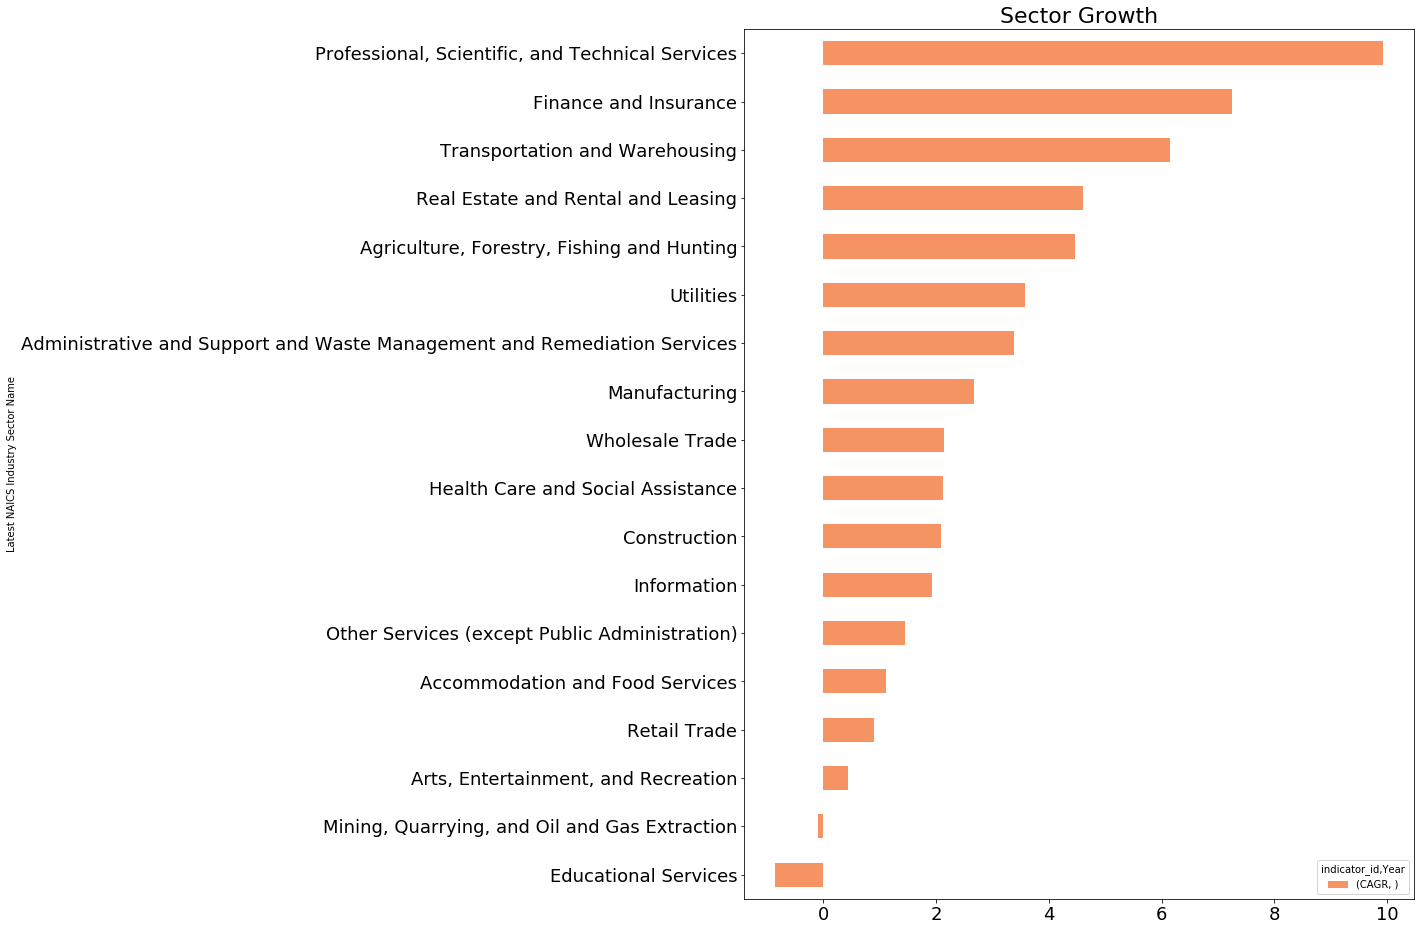

In [20]:
a.loc[a['CAGR'].isin(['inf']),['CAGR']]= np.nan
a.dropna(inplace=True)

res = a[['CAGR']].groupby('Latest NAICS Industry Sector Name').mean()
plt.rcParams['ytick.labelsize']=18
plt.rcParams['xtick.labelsize']=18
plt.rcParams['axes.titlesize']=22
res.sort_values(by='CAGR', ascending=True).plot(title = 'Sector Growth',kind='barh', color='#f59362', figsize=(12,16))

In [21]:
res.sort_values(by='CAGR', ascending=False)

indicator_id,CAGR
Year,
Latest NAICS Industry Sector Name,
"Professional, Scientific, and Technical Services",9.934728
Finance and Insurance,7.242808
Transportation and Warehousing,6.143474
Real Estate and Rental and Leasing,4.601852
"Agriculture, Forestry, Fishing and Hunting",4.470718
Utilities,3.572356
Administrative and Support and Waste Management and Remediation Services,3.376124
Manufacturing,2.679074


From above analysis we can see that the highest growing sector according to our analysis is the __Professional, Scientific, and Technical Services__ Sector. Lets look at the top 5 companies driving the growth in above sector

## Getting Top 5 Companies driving growth in above sector

In [22]:
a.reset_index(inplace=True)
a[['Latest Name','CAGR']][a['Latest NAICS Industry Sector Name'].isin(['Professional, Scientific, and Technical Services'])].sort_values(by='CAGR', ascending=False).head(6)[1:]

indicator_id,Latest Name,CAGR
Year,,
6964,"Groupon, Inc.",204.206935
6976,"Digipath,Inc.",114.522004
6753,Neogenomics Inc,72.071256
6681,"Sorrento Therapeutics, Inc.",71.162553
6738,Live Ventures Inc,35.278010
